# Project:

## Table of Contents
<ul>
<li><a href="Introduction">Introduction</a></li>
<li><a href="Data Wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="Gathering">Gathering</a></li>
        <li><a href="Accessing<">Accessing</a></li>
        <li><a href="Data Cleaning">Data Cleaning</a></li>    
    </ul>
<li><a href="Exploratory Data Analysis">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### INTRODUCTION

WeRateDogs is a popular twitter account that is known for rating tweeted pictures of dogs with amusing coments. The account was created in 2015 and has gained international media recognition both for its popularity and controvertial suspension. In this project, i will be analysing the various datasets from the WeRateDog tweets to know which dog breeds amongst the images tweeted is most loved.

### DATA WRANGLING

In [37]:
# importing dependencies 

import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Data Gathering

In [2]:
#Loading twitter-archive-enhanced.csv into the pandas dataframe

In [38]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
pd.set_option('max_column',17)

In [49]:
df1.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1015  747103485104099331                    NaN                  NaN   
1757  678764513869611008                    NaN                  NaN   
1074  739844404073074688                    NaN                  NaN   
645   793165685325201412                    NaN                  NaN   
2190  668960084974809088                    NaN                  NaN   

                      timestamp  \
1015  2016-06-26 16:25:26 +0000   
1757  2015-12-21 02:30:45 +0000   
1074  2016-06-06 15:40:26 +0000   
645   2016-10-31 19:00:10 +0000   
2190  2015-11-24 01:11:27 +0000   

                                                 source  \
1015  <a href="http://twitter.com/download/iphone" r...   
1757  <a href="http://twitter.com/download/iphone" r...   
1074  <a href="http://twitter.com/download/iphone" r...   
645   <a href="http://twitter.com/download/iphone" r...   
2190  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1015  Guys... I said DOGS with "shark qualities" or ...                  NaN   
1757  Meet Wilson. He got caught humping the futon. ...                  NaN   
1074  This is Simba. He's the grand prize. The troph...                  NaN   
645   This is Benji. He's Air Bud. It's a low effort...                  NaN   
2190  Meet Jaycob. He got scared of the vacuum. Hide...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1015                       NaN                        NaN   
1757                       NaN                        NaN   
1074                       NaN                        NaN   
645                        NaN                        NaN   
2190                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1015  https://twitter.com/dog_rates/status/747103485...                11   
1757  https://twitter.com/dog_rates/status/678764513...                10   
1074  https://twitter.com/dog_rates/status/739844404...                12   
645   https://twitter.com/dog_rates/status/793165685...                12   
2190  https://twitter.com/dog_rates/status/668960084...                10   

      rating_denominator    name doggo floofer pupper puppo  
1015                  10    None  None    None   None  None  
1757                  10  Wilson  None    None   None  None  
1074                  10   Simba  None    None   None  None  
645                   10   Benji  None    None   None  None  
2190                  10  Jaycob  None    None   None  None

In [6]:
#Loading image_prediction.tsv file from the url into the pandas dataframe

In [9]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv','wb') as imgfile:
    imgfile.write(response.content)

In [5]:
df2 = pd.read_csv('image_predictions.tsv',sep ='\t' )

In [50]:
df2.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num             breed_of_p1   p1_conf  p1_status         breed_of_p2  \
0        1  Welsh_springer_spaniel  0.465074       True              collie   
1        1                 redbone  0.506826       True  miniature_pinscher   
2        1         German_shepherd  0.596461       True            malinois   
3        1     Rhodesian_ridgeback  0.408143       True             redbone   
4        1      miniature_pinscher  0.560311       True          Rottweiler   

    p2_conf  p2_status          breed_of_p3   p3_conf  p3_status  
0  0.156665       True    Shetland_sheepdog  0.061428       True  
1  0.074192       True  Rhodesian_ridgeback  0.072010       True  
2  0.138584       True           bloodhound  0.116197       True  
3  0.360687       True   miniature_pinscher  0.222752       True  
4  0.243682       True             Doberman  0.154629       True

In [ ]:
#Loading tweet_json.txt file from the twitter API into the pandas dataframe

In [51]:
df_list = []
with open('tweet_json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
        df3 = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])
df3.tail(5)

tweet_id  retweet_count  favorite_count
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

#### Data Accessing

In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Quality   
   DF1(twitter_archive_enhanced) Table

- Missing data in the following  columns(in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- Text column containg text, rating and url
- timestamp column has datatype as object instead of datetime
- values in the timestamp containing +0000 after the date and time
- source column contains the html ancor tag
- Expanded_url column contains duplicated url in some rows
- Dog name incorrectly recorded as 'a' and 'O'
- Retweeted rows exist in the dataset 
DF2(image_prediction.tsv) Table
- Column names not explanatory
    
  

#### Tidiness

    - Dog stages is one variable, hence should form a single column
    - Information about one type of observational unit(tweets) is spread across all dataframes
   

#### Data Cleaning

#### Define
- Removing all retweeted rows to ensure only original tweets are considered for this analysis
- Droping data in the following columns(in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- Removing the rating and the url in the text column
- Removing +0000 in the Timestamp column and changing the datatype
- Droping the source column as it isn't relevant to the analysis
- changing column names in df2 for clarity purpose
- merging all datasets
- Rearranging all dog stages to form a single column "dog_stages"

In [8]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

#### code

In [9]:
# Removing all retweeted rows to ensure only original tweets are considered for this analysis 

# Removing all retweeted rows observed in retweeted_id_status column
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
# Removing all retweeted rows observered in retweeted_status_user_id column
df1_clean = df1_clean[df1_clean.retweeted_status_user_id.isnull()]
# Removing all retweeted rows observered in retweeted_status_timestamp column
df1_clean = df1_clean[df1_clean.retweeted_status_timestamp.isnull()]

In [10]:
#Droping Missing data in the following columns:
#(in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,source,expanded_urls)
# as they will not be relevant to the purpose of this analysis.
df1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
              'retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls'], axis=1, inplace = True)

In [11]:
# Removing the rating and the url in the text column
df1_clean['text'] = df1_clean['text'].str.extract('(\D+)')

In [12]:
#Removing time, +0000,datatype and column name of the Timestamp column.
df1_clean['timestamp'] = df1_clean['timestamp'].str[0:-5].astype('datetime64')

In [13]:
# Replacing the name of Dog wrongly captured as 'a' and 'o'
df1_clean['name'].replace({'a':'none','o':'none'},inplace = True)

In [14]:
# Rearranging all dog stages to form a single column "dog_stages"

#Replacing all none values with empty strings in all dog stage columns
df1_clean['doggo'].replace('None','', inplace= True)
df1_clean['floofer'].replace('None','', inplace= True)
df1_clean['pupper'].replace('None','', inplace= True)
df1_clean['puppo'].replace('None','', inplace= True)

# Combining all column stages
df1_clean['Dog_stage'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']

# Formatting entries with multiple dog stages
df1_clean.loc[df1_clean.Dog_stage == 'doggopupper','Dog_stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.Dog_stage == 'doggopuppo','Dog_stage'] = 'doggo,puppo'
df1_clean.loc[df1_clean.Dog_stage == 'doggofloofer','Dog_stage'] = 'doggo,floofer'

# Droping cloumns(doggo,flooper,pupper and puppo)
df1_clean.drop(['doggo','floofer','pupper','puppo'], axis =1, inplace = True)

In [15]:
#changing column names in df2 for clarity purpose
df2.rename(columns = {'p1':'breed_of_p1','p1_dog':'p1_status','p2':'breed_of_p2','p2_dog':'p2_status','p3':'breed_of_p3','p3_dog':'p3_status'}, inplace = True)

In [16]:
#merging data
df_merge = pd.merge(df2,df1_clean, on = 'tweet_id', how='inner')

In [18]:
twitter_archive_master = pd.merge(df_merge,df3, on='tweet_id', how = 'inner')

In [19]:
# filling Nan values to enable conversion of datatype to int64
twitter_archive_master['retweet_count'].fillna(0,inplace = True)
twitter_archive_master['favorite_count'].fillna(0,inplace = True)

In [20]:
# Converting datatype to int64
twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].astype('int64')
twitter_archive_master['favorite_count'] = twitter_archive_master['favorite_count'].astype('int64')

In [ ]:
# Saving master data
pd = twitter_archive_master.to_csv('twitter_archive_master', index = False)

#### testing

In [22]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   jpg_url             1994 non-null   object        
 2   img_num             1994 non-null   int64         
 3   breed_of_p1         1994 non-null   object        
 4   p1_conf             1994 non-null   float64       
 5   p1_status           1994 non-null   bool          
 6   breed_of_p2         1994 non-null   object        
 7   p2_conf             1994 non-null   float64       
 8   p2_status           1994 non-null   bool          
 9   breed_of_p3         1994 non-null   object        
 10  p3_conf             1994 non-null   float64       
 11  p3_status           1994 non-null   bool          
 12  timestamp           1994 non-null   datetime64[ns]
 13  text                1994 non-null   object      

In [23]:
twitter_archive_master.sample(5)

tweet_id                                          jpg_url  \
560   677918531514703872  https://pbs.twimg.com/media/CWhzTbzWUAAEAUN.jpg   
1177  738166403467907072  https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg   
687   684188786104872960  https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg   
541   677269281705472000  https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg   
1080  718460005985447936  https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg   

      img_num        breed_of_p1   p1_conf  p1_status  \
560         1         Eskimo_dog  0.199347       True   
1177        2           keeshond  0.878886       True   
687         1             kelpie  0.537782       True   
541         1  Shetland_sheepdog  0.656616       True   
1080        1             badger  0.356946      False   

                         breed_of_p2   p2_conf  ...           timestamp  \
560                        dalmatian  0.153225  ... 2015-12-18 18:29:07   
1177              Norwegian_elkhound  0.086659  ... 2016-06-02 00:32:39   
687   American_Staffordshire_terrier  0.082953  ... 2016-01-05 01:44:52   
541                           collie  0.195405  ... 2015-12-16 23:29:14   
1080                     Boston_bull  0.252781  ... 2016-04-08 15:26:28   

                                                   text  rating_numerator  \
560   "Everything looks pretty good in there. Make s...                10   
1177   This is Axel. He's a professional leaf catcher.                 12   
687   "Yo Boomer I'm taking a selfie, grab your stic...                10   
541        This is the happiest pupper I've ever seen.                 10   
1080  Meet Bowie. He's listening for underground squ...                 9   

      rating_denominator   name Dog_stage  retweet_count  favorite_count  
560                   10   None                      463            1476  
1177                  10   Axel                     3828            9635  
687                   10   None                     1343            3831  
541                   10    the    pupper            790            2164  
1080                  10  Bowie                      602            2846  

[5 rows x 20 columns]

### EXPLORATORY DATA ANALYSIS

#### Analysing dataset to assertain the efficiency of the image prediction algorithim of dog breed(p1).

In [24]:
#creating a new dataframe with the counts
pie_df = twitter_archive_master['p1_status'].value_counts().rename_axis('prediction_status').reset_index(name='counts')
pie_df

prediction_status  counts
0               True    1477
1              False     517

In [25]:
#calculating the total count
total_count = pie_df['counts'].sum()

In [26]:
#creating a function that displays both the counts and pct values
def new_auto_pct(prct_value):
    print(prct_value)
    return'{:.1f}%\n{:.0f}'.format(prct_value,total_count*prct_value/100)
    

In [27]:
# setting values and labels for the pie chart
pie_labels = pie_df.prediction_status
pie_values = pie_df.counts
pie_explode = [0.1,0]

74.07221794128418
25.92778205871582


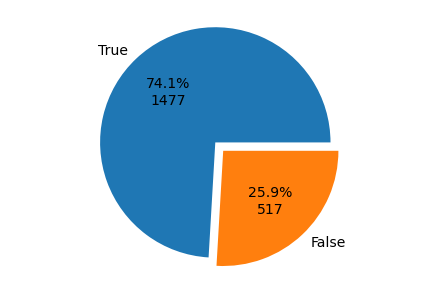

<Figure size 432x288 with 0 Axes>

In [48]:
#visualizing the pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(pie_values, labels=pie_labels,autopct=new_auto_pct,explode=pie_explode, textprops= {'fontsize': 14})
plt.show()
plt.savefig('pie chart showing efficiency of image prediction algorithim.jpeg',dpi = 500)


#### Observations

Given that the image prediction algorithim has the most confidence level of 95 percent, knowing its efficiency as regards this dataset will guide the decision of using p1 as the accepted dog breed for the next analysis. From the pie chart above, 73.8 percent of the predictions were correct and 26.3 percent not correct. Considering this, the next analysis will be based on only the correct predictions made by the image predictor.

#### Analysing the dataset to ascertain the dog breed with the most retweet and favorite count

In [29]:
#filtering the correct predictons from the master dataset.
df_correctPredictor = twitter_archive_master[twitter_archive_master['p1_status'] == True]

In [30]:
#function defining plot parameters.
def label(x,y,t):
    """
    Args:
    x(str): 'x-axis title'
    y(str): 'y-axis title'
    t(str): 'main title'
    Returns:
    None

    """
    plt.xlabel(x,fontsize = 20)
    plt.ylabel(y,fontsize = 20)
    plt.title(t,fontsize = 25)
    plt.tight_layout()
    plt.show()

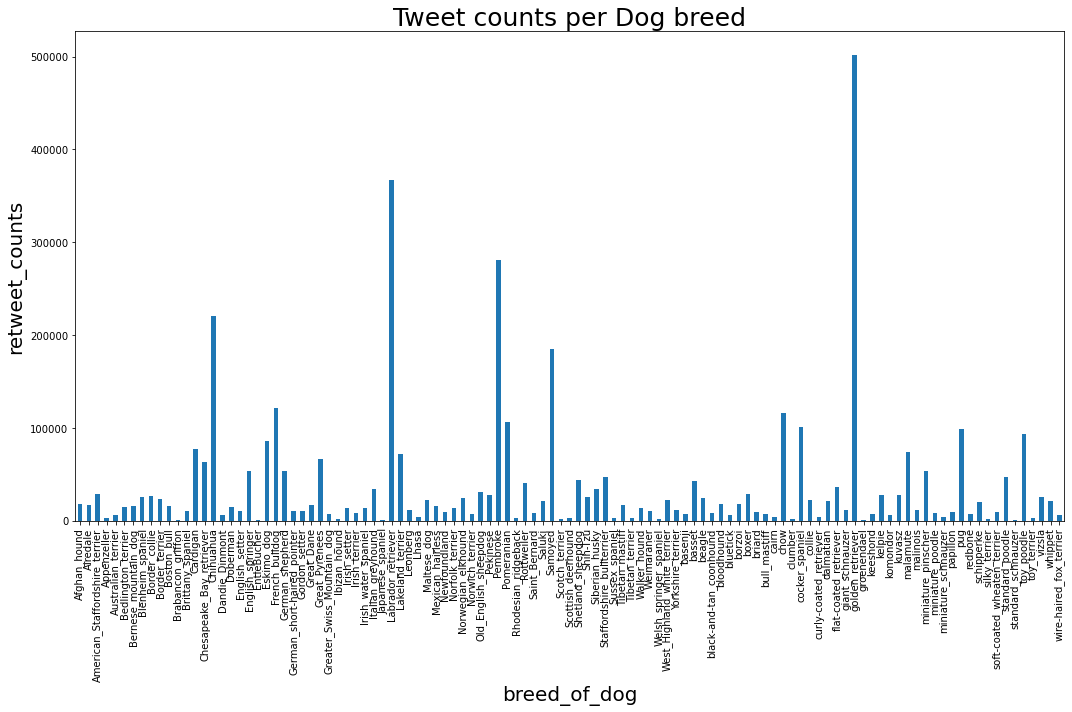

In [31]:
# plot for retweet counts per dog breed
df_correctPredictor.groupby(['breed_of_p1'])['retweet_count'].sum().plot(kind = 'bar', figsize = (15,10))
label('breed_of_dog','retweet_counts','Tweet counts per Dog breed')

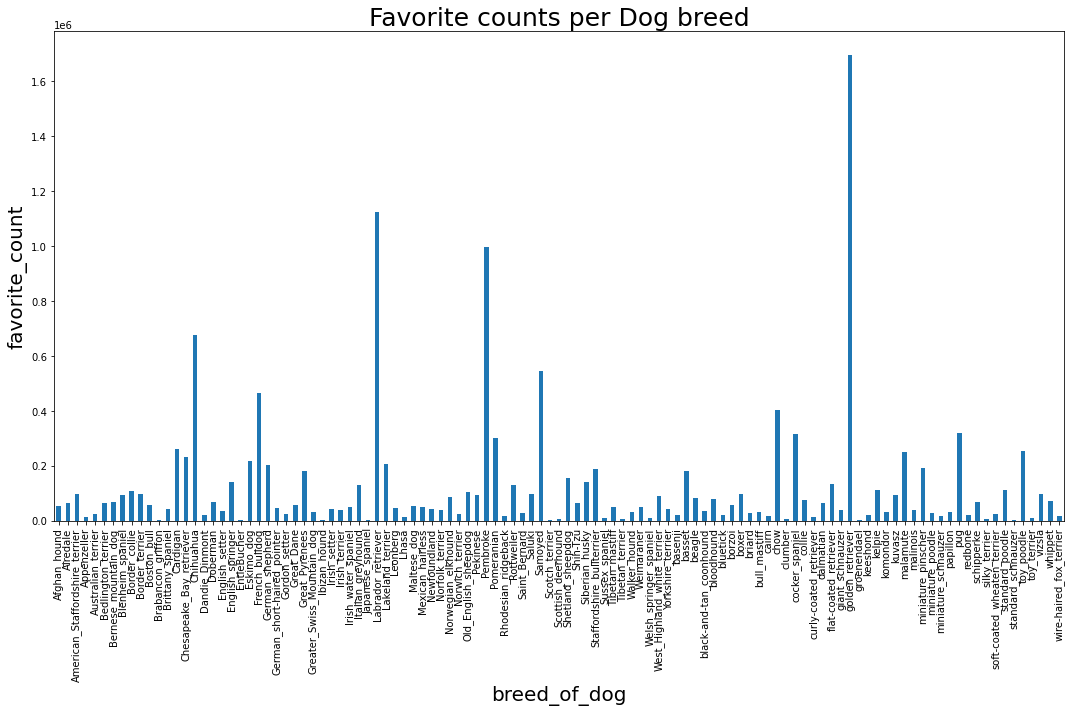

In [32]:
# plot for Favorite counts per dog breed
df_correctPredictor.groupby(['breed_of_p1'])['favorite_count'].sum().plot(kind = 'bar', figsize = (15,10))
label('breed_of_dog','favorite_count','Favorite counts per Dog breed')

#### Observation

The plots above show the sum of retweet counts and sum of favourite counts for each dog breed that was predicted correctly. From the bar plots above, it was observerd that the golden retriever dogs had the most retweets and favourite counts. However, this cannot be completely confirmed until necessary statistical tests have shown so.

#### Analysing dataset to know the relationship between the the dog rating and the favourite counts

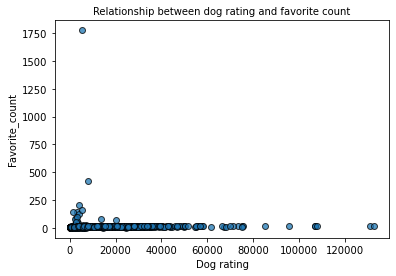

In [33]:
# using a scattered plot to show the relationship between the dog rating and the favourite count
rating = twitter_archive_master['rating_numerator']
favorite = twitter_archive_master['favorite_count']
plt.scatter(favorite, rating,edgecolor='black',linewidth=1,alpha=0.75)
plt.title('Relationship between dog rating and favorite count',fontsize = 10)
plt.ylabel('Favorite_count',fontsize = 10)
plt.xlabel('Dog rating',fontsize = 10)
plt.show()

tweet_id   img_num   p1_conf  p1_status   p2_conf  \
tweet_id            1.000000  0.212854  0.106469   0.120656 -0.002557   
img_num             0.212854  1.000000  0.204406   0.032674 -0.156773   
p1_conf             0.106469  0.204406  1.000000   0.126961 -0.509531   
p1_status           0.120656  0.032674  0.126961   1.000000  0.109214   
p2_conf            -0.002557 -0.156773 -0.509531   0.109214  1.000000   
p2_status           0.123795  0.052354  0.142268   0.635698  0.096064   
p3_conf            -0.049237 -0.141409 -0.707994   0.045770  0.480743   
p3_status           0.097677  0.062725  0.119391   0.558604  0.063713   
rating_numerator    0.023630 -0.000684 -0.009049  -0.029150 -0.020724   
rating_denominator -0.022426 -0.004094 -0.004240   0.000640 -0.034964   
retweet_count       0.405404  0.107198  0.054591   0.008552 -0.018472   
favorite_count      0.655276  0.137053  0.079727   0.054368 -0.021680   

                    p2_status   p3_conf  p3_status  rating_numerator  \
tweet_id             0.123795 -0.049237   0.097677          0.023630   
img_num              0.052354 -0.141409   0.062725         -0.000684   
p1_conf              0.142268 -0.707994   0.119391         -0.009049   
p1_status            0.635698  0.045770   0.558604         -0.029150   
p2_conf              0.096064  0.480743   0.063713         -0.020724   
p2_status            1.000000  0.033552   0.554644         -0.034601   
p3_conf              0.033552  1.000000   0.032731         -0.004173   
p3_status            0.554644  0.032731   1.000000         -0.029355   
rating_numerator    -0.034601 -0.004173  -0.029355          1.000000   
rating_denominator  -0.000709  0.007071   0.004695          0.198240   
retweet_count        0.016161 -0.044230   0.010015          0.013879   
favorite_count       0.060189 -0.053752   0.041207          0.009995   

                    rating_denominator  retweet_count  favorite_count  
tweet_id                     -0.022426       0.405404        0.655276  
img_num                      -0.004094       0.107198        0.137053  
p1_conf                      -0.004240       0.054591        0.079727  
p1_status                     0.000640       0.008552        0.054368  
p2_conf                      -0.034964      -0.018472       -0.021680  
p2_status                    -0.000709       0.016161        0.060189  
p3_conf                       0.007071      -0.044230       -0.053752  
p3_status                     0.004695       0.010015        0.041207  
rating_numerator              0.198240       0.013879        0.009995  
rating_denominator            1.000000      -0.021193       -0.028682  
retweet_count                -0.021193       1.000000        0.912947  
favorite_count               -0.028682       0.912947        1.000000

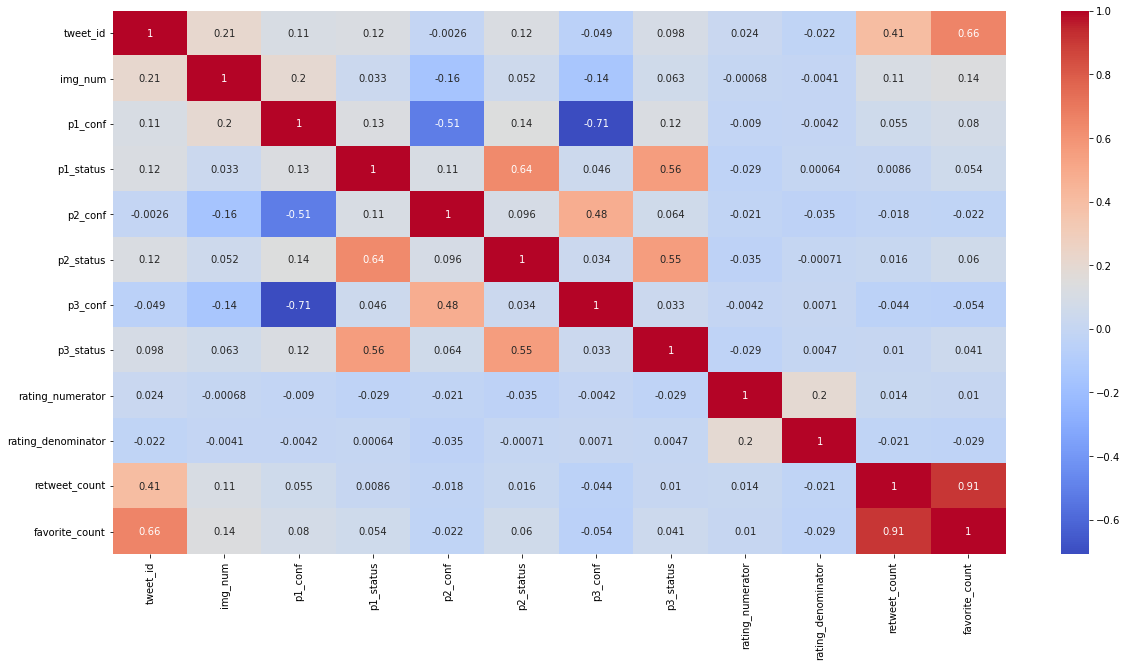

In [34]:
#heatmap showing the relationship of all variables in the dataset
plt.figure(figsize=(20,10))
corel = twitter_archive_master.corr()
sns.heatmap(corel, cmap='coolwarm', annot=True)
corel

#### Observations

From the above charts, both the scattered plot and the heatmap does not show any relationship between the dog ratings and favourite counts of the dog tweets. However, this can only be completely true when neccessary statistical tests have confirmed it.

#### Analysing dataset to assertain the image that was loved the most (image with the most favourite count)

In [35]:
# image with the most favourite count
max_FavoriteCount = twitter_archive_master['favorite_count'].max()
twitter_archive_master[twitter_archive_master['favorite_count'] == max_FavoriteCount]
max_FavoriteCount = twitter_archive_master['favorite_count'].max()
Fav_url = twitter_archive_master[twitter_archive_master['favorite_count'] == max_FavoriteCount]
Fav_url['jpg_url']

1684    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

### Image of the most loved dog.
![](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)

#### Limitations

The only limitation to this analysis was the challenge posed by getting the twitter authentication 
to access the twitter API data. This flaw has now beamed a light of positivity towards ensuring 
that all knowledge and effort required in recording a success as regards that will be channelled in 
to it. Nevertheless, i hope to conduct a further analysis on the dataset in the nearest future to 
explore the relationship between other attributes that were not explored.

### CONCLUSION

The analysis on the WeRateDogs dataset was to assertain how various dog breed fared in various parameters such as ratings, favorite count and retweet counts. The analysis process involved getting the dataset, understanding the structure of the data, cleaning the data and exploring the data. During the course exploration, some research questions were asked, findings were made and observations were stated. Conclusively, it was observed that:
1. There was no correlation between the dog rating and the favourite counts for the dog image tweeted.
2. The dog breed with the most retweet and favourite counts was the Golden Retriever.
3. That the image predictor algorithim was only 73.8 precent efficient.
4. That the dog with the most favourite count is a Lakeland_terrier breed whose name was not provided on the tweet. It had 48265 retweets and was tagged favourite 132810 times. Although this observations were made, they can only be confirmed after being subjected to the neccessary statistical tests.